# Spotify Wrapped Personalizado

In [20]:
import spotipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from spotipy.oauth2 import SpotifyOAuth
from main_functions import *

#Librerías de IA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

plt.rcParams['font.family'] = 'DejaVu Sans'

print("¡Entorno listo para Spotify Wrapped!")

¡Entorno listo para Spotify Wrapped!


Autenticación con Spotify

In [21]:
sp = authenticate_spotify()

✅ Caché eliminada. Inicia sesión con una nueva cuenta.
¡Autenticado como: rubmuiper!


Obtener los artistas y canciones más escuchadas

In [22]:
top_artists = get_top_artists(sp, 50)

artists_n = 20
print(f"\nTus {artists_n} artistas más escuchados:")
display_top_artists(top_artists, artists_n)


Tus 20 artistas más escuchados:
1. Sen Senra - Género: 
2. C. Tangana - Género: flamenco
3. Bad Bunny - Género: reggaeton, trap latino, latin, urbano latino
4. Extremoduro - Género: 
5. Cruz Cafuné - Género: 
6. Kase.O - Género: latin hip hop
7. Ayax y Prok - Género: rap
8. El Combo Dominicano - Género: merengue, orchestra, bachata
9. CA7RIEL & Paco Amoroso - Género: argentine trap
10. Jorge Drexler - Género: trova, singer-songwriter, nueva trova, latin folk
11. Dano - Género: argentine trap, latin hip hop, boom bap
12. Omar Montes - Género: flamenco, flamenco urbano, flamenco pop
13. Bruno Mars - Género: 
14. KEVIN ROLDAN - Género: reggaeton, trap latino, urbano latino
15. Pino D'Angiò - Género: italo disco, italo dance
16. Quevedo - Género: reggaeton
17. Bad Gyal - Género: neoperreo
18. Estopa - Género: flamenco, flamenco pop
19. Rels B - Género: urbano latino, trap latino
20. Agorazein - Género: 


In [23]:
top_tracks = get_top_tracks(sp, limit=50)

tracks_n = 20
print(f"\nTus {tracks_n} canciones más escuchadas:")
display_top_tracks(top_tracks, display_limit=tracks_n)


Tus 20 canciones más escuchadas:
1. 19 Dias y 500 Noches - Artista: Joaquín Sabina
2. Qué Facilidad - Artista: Sen Senra
3. BAILE INoLVIDABLE - Artista: Bad Bunny
4. Goteras - Artista: Omar Montes
5. Duro De Verdad pt.2 - Artista: Los Sufridos
6. Muriendo De Envidia - Artista: C. Tangana
7. Hong Kong - Artista: C. Tangana
8. Ya No Te Hago Falta - Artista: Sen Senra
9. De Ti - Artista: Sen Senra
10. Como Camarón - Artista: Estopa
11. Tank! - Artista: SEATBELTS
12. Scotty Doesn't Know - Artista: Lustra
13. Uno De Eses Gatos - Artista: Sen Senra
14. So payaso - Artista: Extremoduro
15. Libertad - Artista: Kase.O
16. Into Yesterday - Artista: Sugar Ray
17. Los Tontos - Artista: C. Tangana
18. Teknocity - Artista: Parkineos
19. Ma quale idea - Artista: Pino D'Angiò
20. Black Hole - Artista: John Pollõn


Este gráfico nos muestra que tan mainstream eres. O sin embargo tienes un gusto que no se adapta a lo popular.

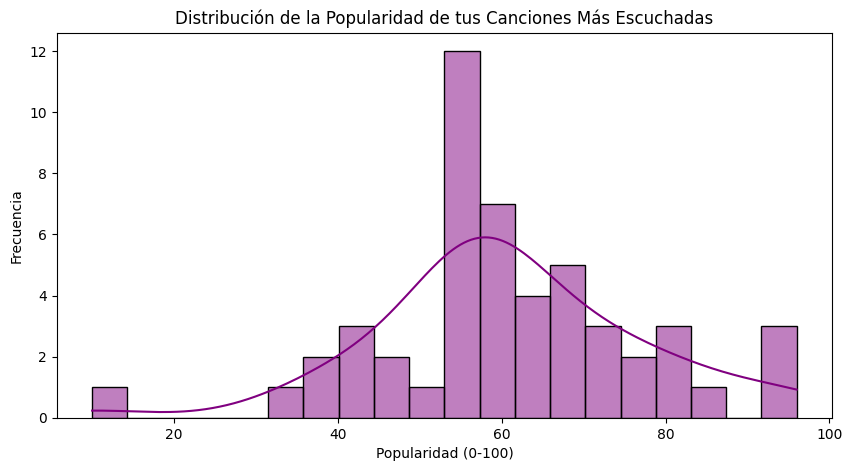

In [24]:
track_popularity = [track['popularity'] for track in top_tracks['items']]

plt.figure(figsize=(10, 5))
sns.histplot(track_popularity, bins=20, kde=True, color='purple')
plt.title('Distribución de la Popularidad de tus Canciones Más Escuchadas')
plt.xlabel('Popularidad (0-100)')
plt.ylabel('Frecuencia')
plt.show()

Años de lanzamiento de tus canciones más escuchadas

C:\Users\RUBEN\AppData\Local\Temp\ipykernel_15496\2735899426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decade', data=year_df, palette='coolwarm', order=year_df['decade'].value_counts().index)


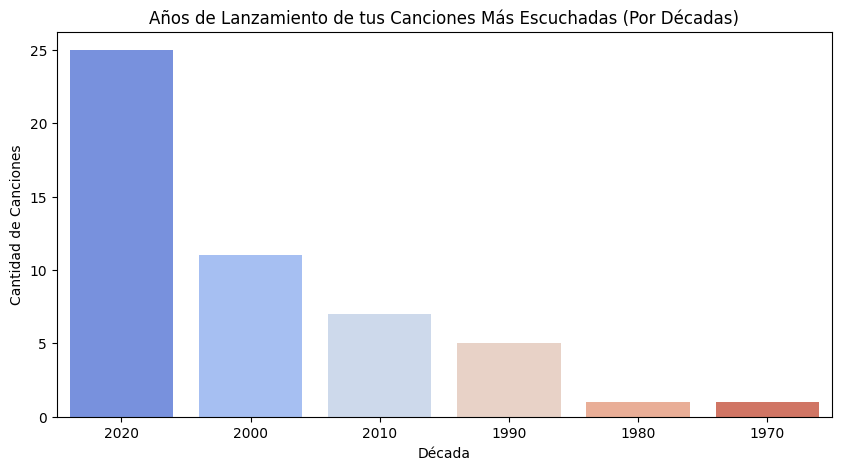

In [25]:
track_years = [int(track['album']['release_date'][:4]) for track in top_tracks['items']]

year_df = pd.DataFrame(track_years, columns=['year'])

year_df['decade'] = (year_df['year'] // 10) * 10

plt.figure(figsize=(10, 5))
sns.countplot(x='decade', data=year_df, palette='coolwarm', order=year_df['decade'].value_counts().index)
plt.title('Años de Lanzamiento de tus Canciones Más Escuchadas (Por Décadas)')
plt.xlabel('Década')
plt.ylabel('Cantidad de Canciones')
plt.show()

Creamos un dataframe con los artistas más escuchados y su género musical

In [26]:
artist_data = pd.DataFrame(top_artists['items'])

artist_data_clean = artist_data[['name', 'genres', 'followers', 'popularity']].copy()

artist_data_clean.loc[:, 'genres'] = artist_data_clean['genres'].apply(lambda x: ', '.join(x) if x else 'Desconocido')

print(artist_data_clean.head())


          name                                        genres  \
0    Sen Senra                                   Desconocido   
1   C. Tangana                                      flamenco   
2    Bad Bunny  reggaeton, trap latino, latin, urbano latino   
3  Extremoduro                                   Desconocido   
4  Cruz Cafuné                                   Desconocido   

                           followers  popularity  
0    {'href': None, 'total': 247408}          64  
1   {'href': None, 'total': 2946645}          72  
2  {'href': None, 'total': 92588228}         100  
3   {'href': None, 'total': 1483632}          65  
4    {'href': None, 'total': 463496}          70  


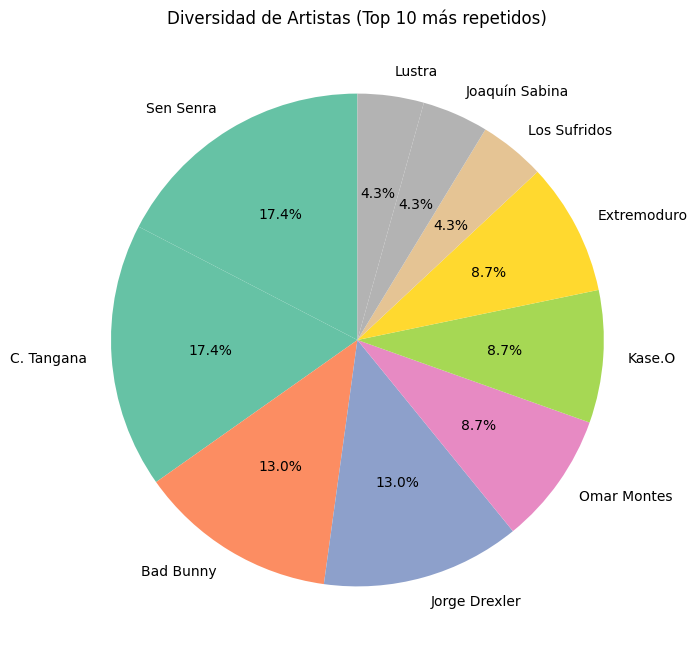

In [27]:
artist_counts = pd.Series([track['artists'][0]['name'] for track in top_tracks['items']]).value_counts()

# Mostrar un gráfico de pastel con los 10 artistas más repetidos
plt.figure(figsize=(8, 8))
artist_counts.head(10).plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Diversidad de Artistas (Top 10 más repetidos)')
plt.ylabel('')
plt.show()


Vamos a analizar los géneros más escuchados

genre
singer-songwriter    1.086239
trova                1.086239
nueva trova          1.086239
flamenco             0.776789
latin                0.408333
urbano latino        0.408333
trap latino          0.408333
reggaeton            0.408333
flamenco pop         0.385714
flamenco urbano      0.310714
Name: weight, dtype: float64


C:\Users\RUBEN\AppData\Local\Temp\ipykernel_15496\346940224.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_weights.head(10).values, y=genre_weights.head(10).index, palette='viridis')


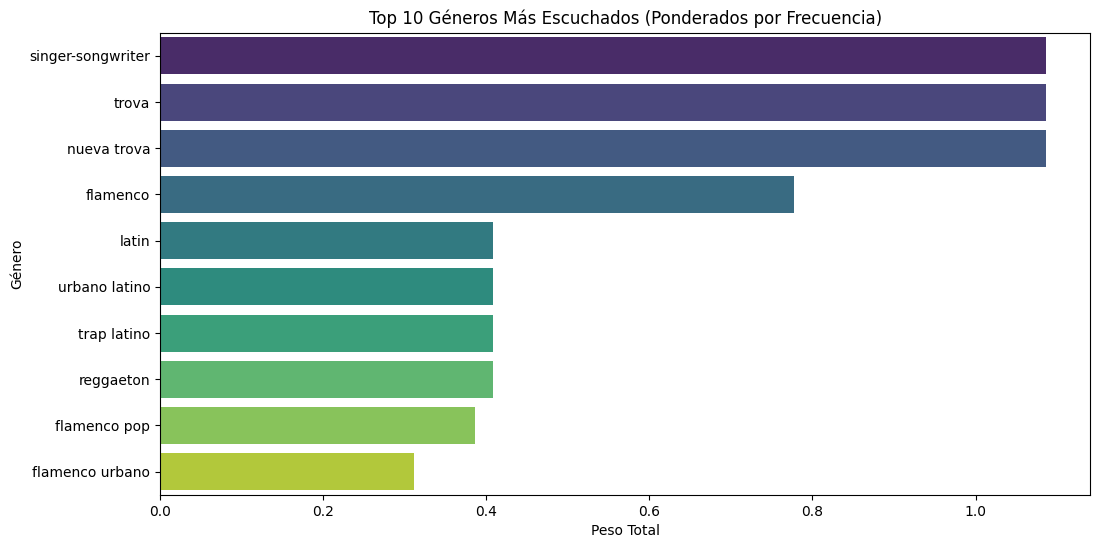

In [28]:
#Procesar las canciones y sus géneros y obtener los detalles de estos
track_data = []

for idx, track in enumerate(top_tracks['items']):
    track_name = track['name']
    main_artist = track['artists'][0]['name']
    artist_id = track['artists'][0]['id']
    
    artist_info = sp.artist(artist_id)
    genres = artist_info['genres']

    # Guardar la información (peso inverso: canción 1 tiene más peso)
    weight = 1 / (idx + 1)  
    for genre in genres:
        track_data.append({'track': track_name, 'artist': main_artist, 'genre': genre, 'weight': weight})

track_df = pd.DataFrame(track_data)

#Calcular el peso total por género
genre_weights = track_df.groupby('genre')['weight'].sum().sort_values(ascending=False)

print(genre_weights.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_weights.head(10).values, y=genre_weights.head(10).index, palette='viridis')
plt.title('Top 10 Géneros Más Escuchados (Ponderados por Frecuencia)')
plt.xlabel('Peso Total')
plt.ylabel('Género')
plt.show()

Ordenamos los artistas según sus seguidores e identificamos el más popular de nuestro top

In [29]:
top_artists = get_top_artists(sp, limit=10)

artist_data = pd.DataFrame(top_artists['items'])
artist_data_clean = artist_data[['name', 'genres', 'followers', 'popularity']].copy()
artist_data_clean['followers'] = artist_data_clean['followers'].apply(lambda x: x['total'])

print("Tus 10 artistas más escuchados:")
print(artist_data_clean)

Tus 10 artistas más escuchados:
                     name                                             genres  \
0               Sen Senra                                                 []   
1              C. Tangana                                         [flamenco]   
2               Bad Bunny     [reggaeton, trap latino, latin, urbano latino]   
3             Extremoduro                                                 []   
4             Cruz Cafuné                                                 []   
5                  Kase.O                                    [latin hip hop]   
6             Ayax y Prok                                              [rap]   
7     El Combo Dominicano                     [merengue, orchestra, bachata]   
8  CA7RIEL & Paco Amoroso                                   [argentine trap]   
9           Jorge Drexler  [trova, singer-songwriter, nueva trova, latin ...   

   followers  popularity  
0     247408          64  
1    2946645          72  
2   92

In [30]:
most_followed_artist = artist_data_clean.loc[artist_data_clean['followers'].idxmax()]
print(f"\nArtista con más seguidores: {most_followed_artist['name']} - {most_followed_artist['followers']} seguidores")


Artista con más seguidores: Bad Bunny - 92588228 seguidores


C:\Users\RUBEN\AppData\Local\Temp\ipykernel_15496\2603963081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_data_clean['popularity'], y=artist_data_clean['name'], palette='magma')
d:\PROGRAMACION\Spotify\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


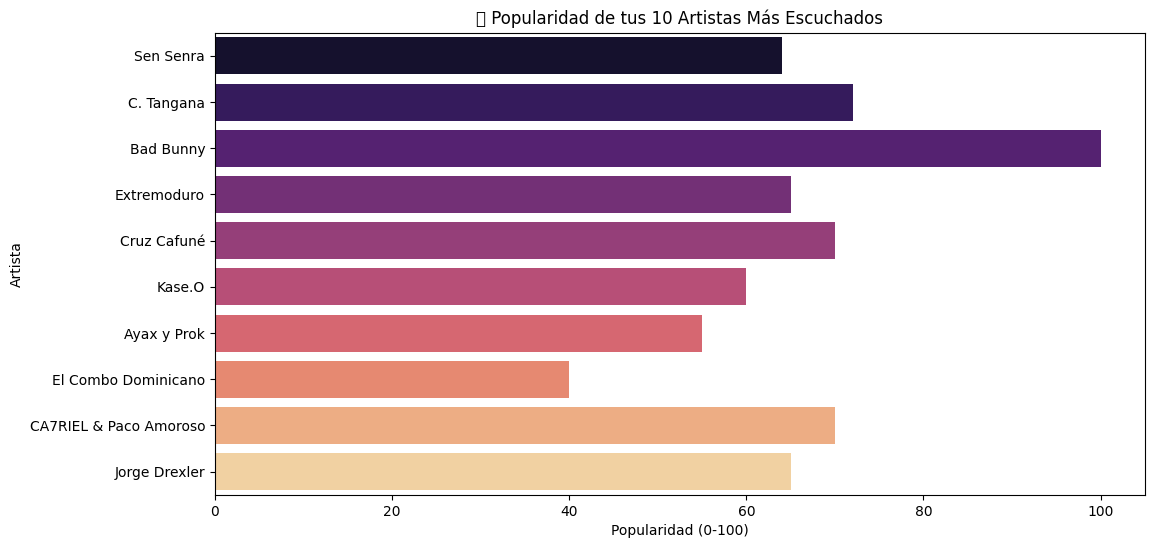

In [31]:
# Gráfico de barras con los artistas más populares (de tus 10 más escuchados)
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_data_clean['popularity'], y=artist_data_clean['name'], palette='magma')
plt.title('🔥 Popularidad de tus 10 Artistas Más Escuchados')
plt.xlabel('Popularidad (0-100)')
plt.ylabel('Artista')
plt.show()

IA QUE PREDICE SI TE GUSTARÁ UNA CANCIÓN O NO

In [32]:
# Obtiene información de las canciones más populares y las guarda en un DataFrame.

top_artists = get_top_artists(sp, 50)

top_tracks = get_top_tracks(sp, limit=50)

track_data = []
for track in top_tracks['items']:
    artist = track['artists'][0]
    artist_name = artist['name']
    
    artist_info = sp.artist(artist['id'])
    genres = artist_info.get('genres', [])

    track_info = {
        'name': track['name'],
        'artist': artist_name,
        'popularity': track['popularity'],
        'release_year': int(track['album']['release_date'][:4]),
        'genres': genres if genres else ['No Genre'],
    }
    track_data.append(track_info)

track_df = pd.DataFrame(track_data)

print(track_df)


                                                 name                artist  \
0                                19 Dias y 500 Noches        Joaquín Sabina   
1                                       Qué Facilidad             Sen Senra   
2                                   BAILE INoLVIDABLE             Bad Bunny   
3                                             Goteras           Omar Montes   
4                                 Duro De Verdad pt.2          Los Sufridos   
5                                 Muriendo De Envidia            C. Tangana   
6                                           Hong Kong            C. Tangana   
7                                 Ya No Te Hago Falta             Sen Senra   
8                                               De Ti             Sen Senra   
9                                        Como Camarón                Estopa   
10                                              Tank!             SEATBELTS   
11                                Scotty Doesn't Kno

In [33]:
# Procesa los datos: crea la columna 'liked', convierte géneros a variables dummy, 
# realiza Label Encoding para 'artist' y elimina columnas no necesarias.

track_df['liked'] = track_df['popularity'].apply(lambda x: 1 if x > 70 else 0)

if 'genres' in track_df.columns:
    track_df = track_df.join(track_df['genres'].str.join('|').str.get_dummies())
    track_df.drop('genres', axis=1, inplace=True)

label_encoder = LabelEncoder()
track_df['artist'] = label_encoder.fit_transform(track_df['artist'])

track_df.drop('name', axis=1, inplace=True)

In [34]:
# Entrena un modelo de Random Forest para predecir si te gusta una canción y calcula la precisión.

X = track_df.drop('liked', axis=1)
y = track_df['liked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

probabilidad = model.predict_proba(X_test)

probabilidad_te_guste = probabilidad[:, 1]
print(f"Probabilidad de que te guste la canción: {probabilidad_te_guste[0] * 100:.2f}%")


Precisión del modelo: 100.00%
Probabilidad de que te guste la canción: 4.00%


FUNCIÓN QUE TE DA RECOMENDACIONES BASÁNDOTE EN TUS CANCIONES MÁS ESCUCHADAS